In [22]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import skimage
import math
import cmath

# A
frame_t12_A = cv2.imread("ownData/OV9732 - 100FOV/D20/A_1.jpeg")
frame_empty_A = cv2.imread("ownData/OV9732 - 100FOV/EMPTY/A_1.jpeg")

# B
frame_t12_B = cv2.imread("ownData/OV9732 - 100FOV/D20/B_1.jpeg")
frame_empty_B = cv2.imread("ownData/OV9732 - 100FOV/EMPTY/B_1.jpeg")

# C
frame_t12_C = cv2.imread("ownData/OV9732 - 100FOV/D20/C_1.jpeg")
frame_empty_C = cv2.imread("ownData/OV9732 - 100FOV/EMPTY/C_1.jpeg")

# Dartboard Setup

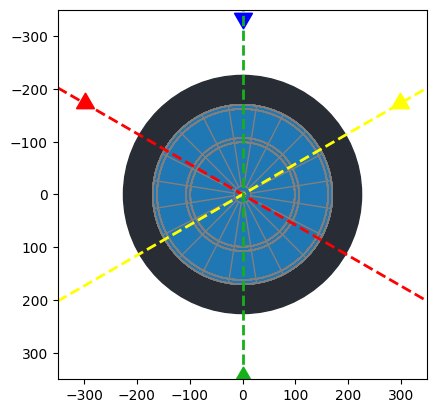

In [23]:
def initDartboard():
    import matplotlib.pyplot as plt
    import math
    from matplotlib.patches import Wedge, Circle
    fig, ax = plt.subplots()
    ax.set_xlim([-350,350])
    ax.set_ylim([350,-350])
    ax.set_box_aspect(1)
    plt.gca().set_aspect('equal')
    foam = plt.Circle((0, 0), 337.5, color='gray')
    board = plt.Circle((0,0), 225.5, color='#282C34')
    outerBull = plt.Circle((0,0), 16)
    innerBull = plt.Circle((0,0), 6.35)
    ax.add_patch(board)
    draw_sector(170, ax) 
    draw_sector(162, ax)
    draw_sector(107, ax)
    draw_sector(99, ax)


    for i in range(0, 20):
        x1 = math.cos((9/180)*math.pi + 2*math.pi/20*i)*16
        y1 = math.sin((9/180)*math.pi + 2*math.pi/20*i)*16

        x2 = math.cos((9/180)*math.pi + 2*math.pi/20*i)*170
        y2 = math.sin((9/180)*math.pi + 2*math.pi/20*i)*170
        
        x1, y1 = [x1, x2], [y1, y2]
        ax.plot(x1, y1, color='grey', linewidth=1)

        circle1 = Circle((0, 0), radius=170, color='grey', fill=False, linewidth=1)
        circle2 = Circle((0, 0), radius=162, color='grey', fill=False, linewidth=1)
        circle3 = Circle((0, 0), radius=107, color='grey', fill=False, linewidth=1)
        circle4 = Circle((0, 0), radius=99, color='grey', fill=False, linewidth=1)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        ax.add_patch(circle3)
        ax.add_patch(circle4)

    ax.add_patch(outerBull)
    ax.add_patch(innerBull)
    circle5 = Circle((0, 0), radius=16, color='grey', fill=False, linewidth=1)
    circle6 = Circle((0, 0), radius=6.35, color='grey', fill=False, linewidth=1)
    ax.add_patch(circle5)
    ax.add_patch(circle6)

    # Camera locations
    aCameraX = -345*math.cos(math.radians(30))
    aCameraY = -345*math.sin(math.radians(30))
    bCameraX = 345*math.cos(math.radians(30))
    bCameraY = -345*math.sin(math.radians(30))
    cCameraX = 0
    cCameraY = 345

    ax.plot(0, -335, color = 'blue', marker=(3, 0, 180), markersize=15)
    ax.plot(aCameraX, aCameraY, color = 'red', marker=(3, 0, 0), markersize=15, )
    ax.plot(bCameraX, bCameraY, color = 'yellow', marker=(3, 0, 0), markersize=15)
    ax.plot(cCameraX, cCameraY, color='#15B01A', marker=(3, 0, 0), markersize=15)

    ax.axline((aCameraX, aCameraY), (aCameraX+10, aCameraY-10*angle_to_gradient(30)), color='red', linestyle='dashed', linewidth=2)
    ax.axline((bCameraX, bCameraY), (bCameraX+10, bCameraY-10*angle_to_gradient(-30)), color='yellow', linestyle='dashed', linewidth=2)
    ax.axline((cCameraX, cCameraY), (cCameraX+10, cCameraY-10*angle_to_gradient(-90)), color='#15B01A', linestyle='dashed', linewidth=2)

    return fig, ax

def draw_sector(radius, ax):
    from matplotlib.patches import Wedge
    for i in range(0, 20):
        theta1 = 9 + 18*(i-1)
        theta2 = 9 + (18*i)

        if i % 2 == 0:
            sector = Wedge((0,0), radius, theta1, theta2)
        else:
            sector = Wedge((0,0), radius, theta1, theta2)

        ax.add_patch(sector)

def angle_to_gradient(angle):

    if angle == 0:
        slope = 0
    if angle < 0:
        slope = 1
    if angle > 0:
        slope = -1

    angle = abs(angle)

    gradient = math.sin(math.radians(angle)) / math.cos(math.radians(angle))
    gradient *= slope
    
    return gradient

fig, ax = initDartboard()

# Livebilder

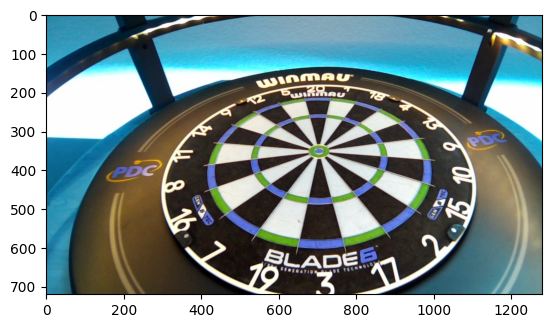

In [26]:
plt.show(plt.imshow(frame_empty_C))

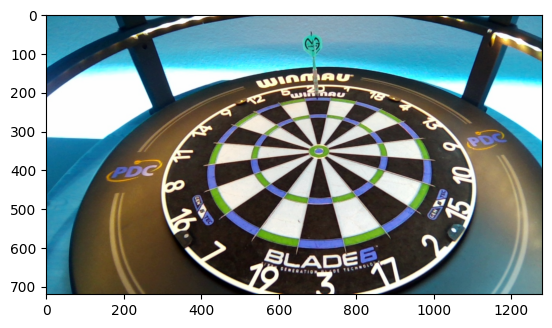

In [27]:
plt.show(plt.imshow(frame_t12_C))

# Erkennung der Dartspitze

## Differenz der Bilder

calculating difference


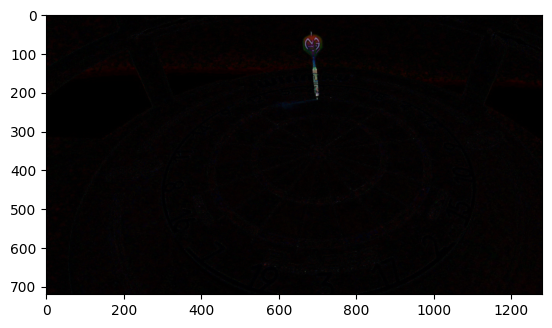


converted img from rgb to gray


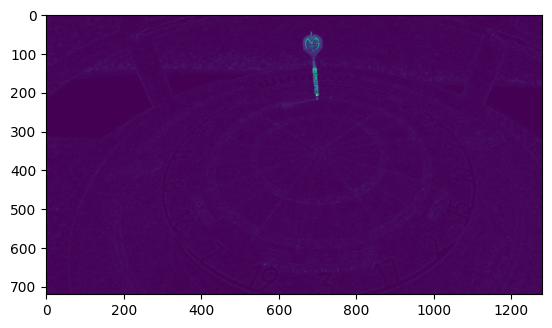

In [29]:
def create_difference(beforeframe, afterframe, medianfilterkernelsize = 5):
    # Berechnung absolute Differenz zwischen den übergebenen Bildern
    diff = cv2.absdiff(beforeframe, afterframe)
    print("calculating difference")
    plt.show(plt.imshow(diff))
    print()

    # Umwandlung Farbformat von RGB nach Graustufen
    grayscale = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    print("converted img from rgb to gray")
    plt.show(plt.imshow(grayscale))
    print()

    # Bildglättung mit Medianfilter mit ksize-Filterfenstergröße
    blurred = cv2.medianBlur(grayscale, medianfilterkernelsize)
    #print(f"geglättetes Bild mit Kernelgröße: {medianfilterkernelsize}")
    #plt.show(plt.imshow(blurred))
    #print()

    return blurred

frame_diff = create_difference(frame_empty_C, frame_t12_C)

## Bildverarbeitung

received image


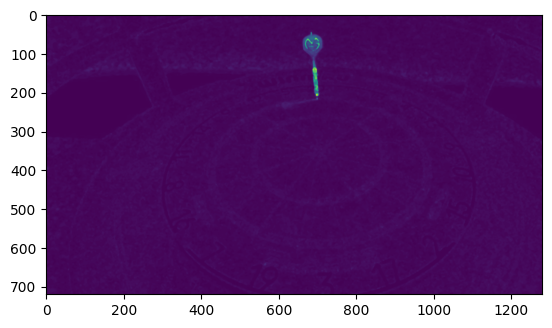



Returns


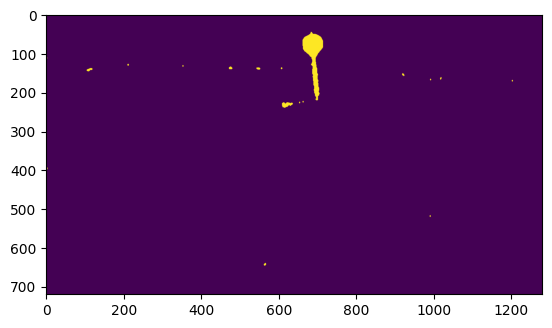

In [36]:
def image_processing(diff_frame):
    print(f"received image")
    plt.show(plt.imshow(diff_frame))

        # Canny Algorithm
    can = cv2.Canny(diff_frame, 30, 90)
    #print("Canny Algorithm")
    #plt.show(plt.imshow(can))
    #
    #print()
    #
        # Return threshold value based on the triangle algorithm
    triangle_threshold = skimage.filters.threshold_triangle(diff_frame)
    #print(f"triangle_threshold: {triangle_threshold}")
    _, triangle = cv2.threshold(diff_frame, triangle_threshold, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(triangle))

    #print()

        # Return threshold value based on Yen´s method  
    yen_threshold = skimage.filters.threshold_yen(diff_frame)
    #print(f"yen_threshold: {yen_threshold}")
    _, yen = cv2.threshold(diff_frame, yen_threshold, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(yen))

    #print()

        # Return threshold value based on Li´s iterative Minimum Cross Entropy method
    li_threshold = skimage.filters.threshold_li(diff_frame)
    #print(f"li_threshold: {li_threshold}")
    _, li = cv2.threshold(diff_frame, li_threshold, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(li))

    #print()

        # Skalierung der Werte in einem Bild (auch hin zu Absolutwerten)
    combined_threshs = (triangle/3) + (yen/3) + (li/3)
    #own try: combined_threshs = triangle / 2 + yen / 2
    #print(f"combined_thresh: {combined_threshs}" + "\n")
    combined_threshs = cv2.convertScaleAbs(combined_threshs)
    ret, all = cv2.threshold(combined_threshs, 150, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(all))

    #print()

        # Morphological operations to remove noise
        # kernels as ellipse with 3x5
    kernelOpen = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5))
    kernelClose = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5))

    # Anwendung der erzeugten Kernel auf das combined_thresh img
    morphological_kernelOpen = cv2.morphologyEx(all, cv2.MORPH_OPEN, kernelOpen)
    #print("Morphological kernel as ellipse 3x5 operations\nKernelOpen:")
    #plt.show(plt.imshow(morphological_kernelOpen))

    morphological_kernelClose = cv2.morphologyEx(morphological_kernelOpen, cv2.MORPH_CLOSE, kernelClose)
    #print("KernelClose:")
    #plt.show(plt.imshow(morphological_kernelClose))
    img_preprocessed = morphological_kernelClose

    # Berechnung threshold & Anwendung Open/Close - Kernel auf geglättetes Bild vom Anfang
    # mithilfe des übergebenen Parameters "thresh_val"
    thresh_val = 15
    #print(f"eingegangenes geglättetes Bild")
    #plt.show(plt.imshow(blurred_diff_frame))

    _, thresh = cv2.threshold(diff_frame, thresh_val, 255, cv2.THRESH_BINARY)
    #print("Anwendung threshold..")
    #plt.show(plt.imshow(thresh))

    print()

    # Anwendung Open Kernel
    thresh_morph_kernelOpen = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernelOpen)
    #print("Anwendung Kernel Open")
    #plt.show(plt.imshow(thresh_morph_kernelOpen))

    print()

    # Anwendung Close Kernel
    thresh_morph_kernelClose = cv2.morphologyEx(thresh_morph_kernelOpen, cv2.MORPH_CLOSE, kernelClose)
    #print("Anwendung Kernel Close")
    #plt.show(plt.imshow(thresh_morph_kernelClose))

    #print()

    # Combine thresholded image with Canny edge detector
    final = img_preprocessed | can
    #plt.show(plt.imshow(final))

    print("Returns")
    # Returns:
    #print("final")
    plt.show(plt.imshow(final))
    #print("thresh")
    #plt.show(plt.imshow(thresh_morph_kernelClose))

    return final, thresh_morph_kernelClose

#testframe_ = cv2.imread("ownData/OV9732 - 100FOV/D20/C_1.jpeg")
#testframe_empty_ = cv2.imread("ownData/OV9732 - 100FOV/EMPTY/C_1.jpeg")
#frame_diff = create_difference(testframe_empty_, testframe_)

final_ksize, thresh_ksize = image_processing(frame_diff)

## Erkennung der Dartspitze

Find Dart Tip:
Anzahl detektierte Konturen = 19

Kontur: 1
mean potential: (np.int64(698), np.int64(220))


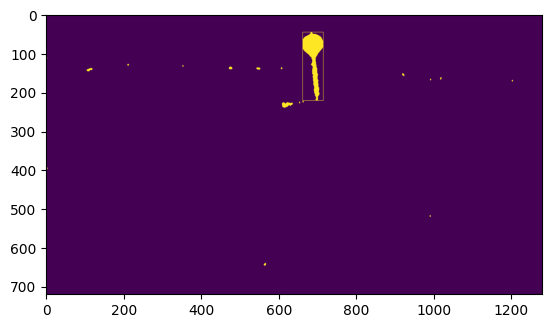

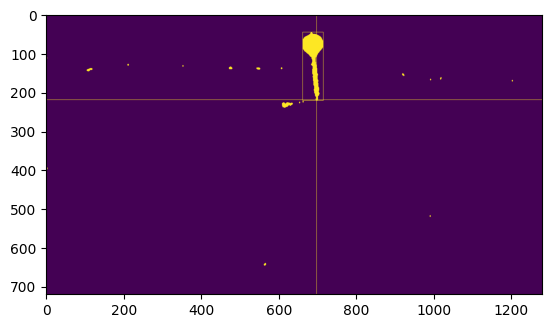

set val to new potential

Kontur: 2
h [14] < w [28]

Kontur: 3
h [9] < w [15]

Kontur: 4
size [39.5] < 50

Kontur: 5
size [36.0] < 50

Kontur: 6
size [22.5] < 50

Kontur: 7
size [21.0] < 50

Kontur: 8
size [14.5] < 50

Kontur: 9
size [12.0] < 50

Kontur: 10
size [10.0] < 50

Kontur: 11
size [10.0] < 50

Kontur: 12
size [10.0] < 50

Kontur: 13
size [6.0] < 50

Kontur: 14
size [6.0] < 50

Kontur: 15
size [6.0] < 50

Kontur: 16
size [6.0] < 50

Kontur: 17
size [6.0] < 50

Kontur: 18
size [6.0] < 50

Kontur: 19
size [5.0] < 50

Result of Find Dart Tip:
Dart Tip: (np.int32(697), np.int32(221))


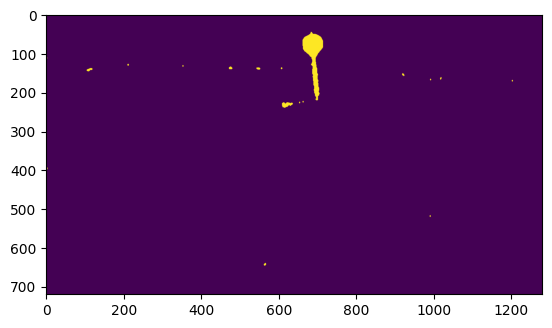

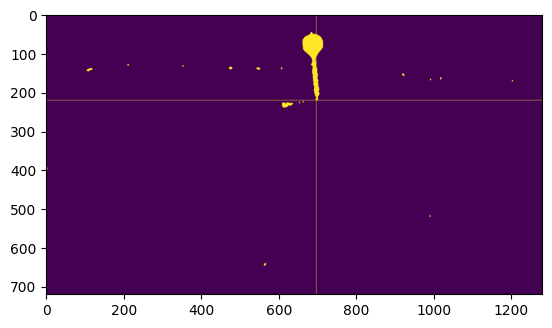

In [40]:
def find_dart_tip(processedImage):
    contours, hierarchy = cv2.findContours(processedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    returnvalue = 0
    contourLength = len(contours)
    print(f"Find Dart Tip:\nAnzahl detektierte Konturen = {contourLength}")
    if contourLength == 0:
        returnvalue = 0
    else:
        contoursSorted = sorted(contours, key = cv2.contourArea, reverse= True)
        contournumber = 0
        for contour in contoursSorted:
            contournumber += 1
            print(f"\nKontur: {contournumber}") 
            size = cv2.contourArea(contour)
            x, y, w, h = cv2.boundingRect(contour)

            if size > 10000:
                returnvalue = "Hand"
                print("Hand")
                break
            elif size < 50:
                print(f"size [{size}] < 50")
                continue
            elif h < w:
                print(f"h [{h}] < w [{w}]")
                continue
            else:
                potential = tuple(contour[contour[:, :, 1].argmax()][0])
                thresh_for_high_y_coordinate = potential[1] - 2
                all_high_y_coordinates = contour[contour[:,:,1] >= thresh_for_high_y_coordinate]
                potential_all_mean = np.mean(all_high_y_coordinates, axis = 0)
                potential_all_mean = tuple(np.rint(potential_all_mean).astype(int))

                print(f"mean potential: {potential_all_mean}")

                contourimage = processedImage.copy()
                cv2.rectangle(contourimage, (x,y), (x+w, y+h), (255,255,255), 1)
                plt.show(plt.imshow(contourimage))
                
                cv2.line(contourimage, (0, potential_all_mean[1]), (contourimage.shape[1], potential_all_mean[1]),  color=(255, 255, 255), thickness=1)
                cv2.line(contourimage, (potential_all_mean[0], 0), (potential_all_mean[0], contourimage.shape[0]),  color=(255, 255, 255), thickness=1)
                plt.show(plt.imshow(contourimage))

                if returnvalue != 0:
                    if returnvalue[1] < potential[1]:
                        returnvalue = potential
                        print("set val to new potential")
                else:
                    returnvalue = potential
                    print("set val to new potential")

    if returnvalue != 0 and returnvalue != "Hand":
        print()
        print("Result of Find Dart Tip:")
        print(f"Dart Tip: {returnvalue}")
        plt.show(plt.imshow(processedImage))
        processedLineImage = processedImage.copy()
        cv2.line(processedLineImage, (0, returnvalue[1]), (processedLineImage.shape[1], returnvalue[1]),  color=(255, 255, 255), thickness=1)
        cv2.line(processedLineImage, (returnvalue[0], 0), (returnvalue[0], processedLineImage.shape[0]),  color=(255, 255, 255), thickness=1)
        plt.show(plt.imshow(processedLineImage))

    return returnvalue

tipfinal_ksize = find_dart_tip(final_ksize)

# Bestimmung der Geraden mithilfe des FOV

![Alt-Text](FOV.png)

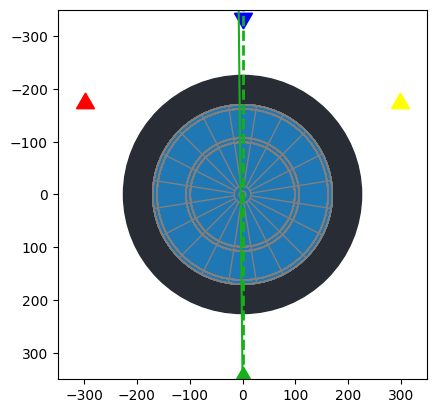

In [53]:
def initDartboard():
    import matplotlib.pyplot as plt
    import math
    from matplotlib.patches import Wedge, Circle
    fig, ax = plt.subplots()
    ax.set_xlim([-350,350])
    ax.set_ylim([350,-350])
    ax.set_box_aspect(1)
    plt.gca().set_aspect('equal')
    foam = plt.Circle((0, 0), 337.5, color='gray')
    board = plt.Circle((0,0), 225.5, color='#282C34')
    outerBull = plt.Circle((0,0), 16)
    innerBull = plt.Circle((0,0), 6.35)
    ax.add_patch(board)
    draw_sector(170, ax) 
    draw_sector(162, ax)
    draw_sector(107, ax)
    draw_sector(99, ax)


    for i in range(0, 20):
        x1 = math.cos((9/180)*math.pi + 2*math.pi/20*i)*16
        y1 = math.sin((9/180)*math.pi + 2*math.pi/20*i)*16

        x2 = math.cos((9/180)*math.pi + 2*math.pi/20*i)*170
        y2 = math.sin((9/180)*math.pi + 2*math.pi/20*i)*170
        
        x1, y1 = [x1, x2], [y1, y2]
        ax.plot(x1, y1, color='grey', linewidth=1)

        circle1 = Circle((0, 0), radius=170, color='grey', fill=False, linewidth=1)
        circle2 = Circle((0, 0), radius=162, color='grey', fill=False, linewidth=1)
        circle3 = Circle((0, 0), radius=107, color='grey', fill=False, linewidth=1)
        circle4 = Circle((0, 0), radius=99, color='grey', fill=False, linewidth=1)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        ax.add_patch(circle3)
        ax.add_patch(circle4)

    ax.add_patch(outerBull)
    ax.add_patch(innerBull)
    circle5 = Circle((0, 0), radius=16, color='grey', fill=False, linewidth=1)
    circle6 = Circle((0, 0), radius=6.35, color='grey', fill=False, linewidth=1)
    ax.add_patch(circle5)
    ax.add_patch(circle6)

    # Camera locations
    aCameraX = -345*math.cos(math.radians(30))
    aCameraY = -345*math.sin(math.radians(30))
    bCameraX = 345*math.cos(math.radians(30))
    bCameraY = -345*math.sin(math.radians(30))
    cCameraX = 0
    cCameraY = 345

    ax.plot(0, -335, color = 'blue', marker=(3, 0, 180), markersize=15)
    ax.plot(aCameraX, aCameraY, color = 'red', marker=(3, 0, 0), markersize=15, )
    ax.plot(bCameraX, bCameraY, color = 'yellow', marker=(3, 0, 0), markersize=15)
    ax.plot(cCameraX, cCameraY, color='#15B01A', marker=(3, 0, 0), markersize=15)

    #ax.axline((aCameraX, aCameraY), (aCameraX+10, aCameraY-10*angle_to_gradient(30)), color='red', linestyle='dashed', linewidth=2)
    #ax.axline((bCameraX, bCameraY), (bCameraX+10, bCameraY-10*angle_to_gradient(-30)), color='yellow', linestyle='dashed', linewidth=2)
    ax.axline((cCameraX, cCameraY), (cCameraX+10, cCameraY-10*angle_to_gradient(-90)), color='#15B01A', linestyle='dashed', linewidth=2)

    return fig, ax

def draw_sector(radius, ax):
    from matplotlib.patches import Wedge
    for i in range(0, 20):
        theta1 = 9 + 18*(i-1)
        theta2 = 9 + (18*i)

        if i % 2 == 0:
            sector = Wedge((0,0), radius, theta1, theta2)
        else:
            sector = Wedge((0,0), radius, theta1, theta2)

        ax.add_patch(sector)

def angle_to_gradient(angle):

    if angle == 0:
        slope = 0
    if angle < 0:
        slope = 1
    if angle > 0:
        slope = -1

    angle = abs(angle)

    gradient = math.sin(math.radians(angle)) / math.cos(math.radians(angle))
    gradient *= slope
    
    return gradient

#fig, ax = initDartboard()

def showOnDartboard():
    import matplotlib.pyplot as plt
    import math
    from matplotlib.patches import Wedge, Circle

    cGradient = -95.35502851439715
    # Camera locations
    aCameraX = -345*math.cos(math.radians(30))
    aCameraY = -345*math.sin(math.radians(30))
    bCameraX = 345*math.cos(math.radians(30))
    bCameraY = -345*math.sin(math.radians(30))
    cCameraX = 0
    cCameraY = 345

    fig, ax = initDartboard()

    #ax.axline((aCameraX, aCameraY), (aCameraX + 10, aCameraY - 10 * aGradient), color= 'red', linestyle= 'solid', linewidth = 1.5)
    #ax.axline((bCameraX, bCameraY), (bCameraX + 10, bCameraY - 10 * bGradient), color= 'yellow', linestyle= 'solid', linewidth = 1.5)
    ax.axline((cCameraX, cCameraY), (cCameraX + 10, cCameraY - 10 * cGradient), color= '#15B01A', linestyle= 'solid', linewidth = 1.5)

    fig

showOnDartboard()

# Berechnung Dartscore

Dart Score: S20


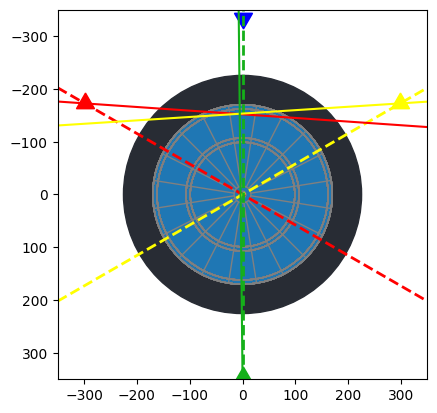

In [62]:
# calc dart score

def croppImageFrame(frame, resizeWidth, resizeHeight, croppedHeight):
    #print("Readed Frame")
    #readed_frame = plt.imshow(frame)
    #plt.show(readed_frame)

    # resized image
    resizedFrame = cv2.resize(frame, (resizeWidth, resizeHeight))
    #print("ResizedTestFrame")
    #resizedTestFrame = plt.imshow(resizedFrame)
    #plt.show(resizedTestFrame)

    # cropped image
    #croppedFrame = resizedFrame[croppedHeight:480, 300:950]
    croppedFrame = resizedFrame
    #print("CroppedTestFrame")
    #CroppedTestFrame = plt.imshow(croppedFrame)
    #plt.show(CroppedTestFrame)

    return croppedFrame

def create_difference(beforeframe, afterframe, medianfilterkernelsize = 5):
    # Berechnung absolute Differenz zwischen den übergebenen Bildern
    diff = cv2.absdiff(beforeframe, afterframe)
    #print("calculating difference")
    #plt.show(plt.imshow(diff))
    #print()

    # Umwandlung Farbformat von RGB nach Graustufen
    grayscale = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)
    #print("converted img from rgb to gray")
    #plt.show(plt.imshow(grayscale))
    #print()

    # Bildglättung mit Medianfilter mit ksize-Filterfenstergröße
    blurred = cv2.medianBlur(grayscale, medianfilterkernelsize)
    #print(f"geglättetes Bild mit Kernelgröße: {medianfilterkernelsize}")
    #plt.show(plt.imshow(blurred))
    #print()

    return blurred

def image_processing(blurred_diff_frame):
    # Canny Algorithm
    can = cv2.Canny(blurred_diff_frame, 30, 90)
    #print("Canny Algorithm")
    #plt.show(plt.imshow(can))

    #print()

    # Return threshold value based on the triangle algorithm
    triangle_threshold = skimage.filters.threshold_triangle(blurred_diff_frame)
    #print(f"triangle_threshold: {triangle_threshold}")
    _, triangle = cv2.threshold(blurred_diff_frame, triangle_threshold, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(triangle))

    #print()

    # Return threshold value based on Yen´s method
    yen_threshold = skimage.filters.threshold_yen(blurred_diff_frame)
    #print(f"yen_threshold: {yen_threshold}")
    _, yen = cv2.threshold(blurred_diff_frame, yen_threshold, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(yen))

    #print()

    # Return threshold value based on Li´s iterative Minimum Cross Entropy method
    li_threshold = skimage.filters.threshold_li(blurred_diff_frame)
    #print(f"li_threshold: {li_threshold}")
    _, li = cv2.threshold(blurred_diff_frame, li_threshold, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(li))

    #print()

    # Skalierung der Werte in einem Bild (auch hin zu Absolutwerten)
    combined_threshs = (triangle/3) + (yen/3) + (li/3)
    #own try: combined_threshs = triangle / 2 + yen / 2
    #print(f"combined_thresh: {combined_threshs}" + "\n")
    combined_threshs = cv2.convertScaleAbs(combined_threshs)
    ret, all = cv2.threshold(combined_threshs, 150, 255, cv2.THRESH_BINARY)
    #plt.show(plt.imshow(all))

    #print()

    # Morphological operations to remove noise
    # kernels as ellipse with 3x5
    kernelOpen = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5))
    kernelClose = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,5))

    # Anwendung der erzeugten Kernel auf das combined_thresh img
    morphological_kernelOpen = cv2.morphologyEx(all, cv2.MORPH_OPEN, kernelOpen)
    #print("Morphological kernel as ellipse 3x5 operations\nKernelOpen:")
    #plt.show(plt.imshow(morphological_kernelOpen))

    morphological_kernelClose = cv2.morphologyEx(morphological_kernelOpen, cv2.MORPH_CLOSE, kernelClose)
    #print("KernelClose:")
    #plt.show(plt.imshow(morphological_kernelClose))
    img_preprocessed = morphological_kernelClose

    # Berechnung threshold & Anwendung Open/Close - Kernel auf geglättetes Bild vom Anfang
    # mithilfe des übergebenen Parameters "thresh_val"
    thresh_val = 15
    #print(f"eingegangenes geglättetes Bild")
    #plt.show(plt.imshow(blurred_diff_frame))

    _, thresh = cv2.threshold(blurred_diff_frame, thresh_val, 255, cv2.THRESH_BINARY)
    #print("Anwendung threshold..")
    #plt.show(plt.imshow(thresh))

    #print()

    # Anwendung Open Kernel
    thresh_morph_kernelOpen = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernelOpen)
    #print("Anwendung Kernel Open")
    #plt.show(plt.imshow(thresh_morph_kernelOpen))

    #print()

    # Anwendung Close Kernel
    thresh_morph_kernelClose = cv2.morphologyEx(thresh_morph_kernelOpen, cv2.MORPH_CLOSE, kernelClose)
    #print("Anwendung Kernel Close")
    #plt.show(plt.imshow(thresh_morph_kernelClose))

    #print()

    # Combine thresholded image with Canny edge detector
    final = img_preprocessed | can
    #plt.show(plt.imshow(final))

    #print("Returns")
    # Returns:
    #print("final")
    #plt.show(plt.imshow(final))
    #print("thresh")
    #plt.show(plt.imshow(thresh_morph_kernelClose))

    return final, thresh_morph_kernelClose

def find_dart_tip(processedImage):
    contours, hierarchy = cv2.findContours(processedImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    returnvalue = 0
    contourLength = len(contours)
    #print(f"FindingDartTip:\nAnzahl detektierte Konturen = {contourLength}")
    if contourLength == 0:
        returnvalue = 0
    else:
        contoursSorted = sorted(contours, key = cv2.contourArea, reverse= True)
        contournumber = 0
        for contour in contoursSorted:
            contournumber += 1
            #print(f"\nKontur: {contournumber}") 
            size = cv2.contourArea(contour)
            x, y, w, h = cv2.boundingRect(contour)

            if size > 10000:
                returnvalue = "Hand"
                #print("Hand")
                break
            elif size < 50:
                #print(f"size [{size}] < 50")
                continue
            elif h < w:
                #print(f"h [{h}] < w [{w}]")
                continue
            else:
                potential = tuple(contour[contour[:, :, 1].argmax()][0])
                thresh_for_high_y_coordinate = potential[1] - 2
                all_high_y_coordinates = contour[contour[:,:,1] >= thresh_for_high_y_coordinate]
                potential_all_mean = np.mean(all_high_y_coordinates, axis = 0)
                potential_all_mean = tuple(np.rint(potential_all_mean).astype(int))

                #print(f"mean potential: {potential_all_mean}")

                contourimage = processedImage.copy()
                cv2.rectangle(contourimage, (x,y), (x+w, y+h), (255,255,255), 1)
                #plt.show(plt.imshow(contourimage))
                
                cv2.line(contourimage, (0, potential_all_mean[1]), (contourimage.shape[1], potential_all_mean[1]),  color=(255, 255, 255), thickness=1)
                cv2.line(contourimage, (potential_all_mean[0], 0), (potential_all_mean[0], contourimage.shape[0]),  color=(255, 255, 255), thickness=1)
                #plt.show(plt.imshow(contourimage))

                if returnvalue != 0:
                    if returnvalue[1] < potential[1]:
                        returnvalue = potential
                        #print("set val to new potential")
                else:
                    returnvalue = potential
                    #print("set val to new potential")

    if returnvalue != 0 and returnvalue != "Hand":
        #print("Result of Find Dart Tip:")
        #plt.show(plt.imshow(processedImage))
        processedLineImage = processedImage.copy()
        cv2.line(processedLineImage, (0, returnvalue[1]), (processedLineImage.shape[1], returnvalue[1]),  color=(255, 255, 255), thickness=1)
        cv2.line(processedLineImage, (returnvalue[0], 0), (returnvalue[0], processedLineImage.shape[0]),  color=(255, 255, 255), thickness=1)
        #plt.show(plt.imshow(processedLineImage))

    return returnvalue

def find_angle(xPos, width, fov):
    # Returns the angle between the detected point and the center of the image
    x = xPos - width/2

    angle = math.atan((2*x*math.tan(math.radians(fov/2)))/(width))
    angle = math.degrees(angle)
    
    #print(f"Angle: {angle}")

    return angle

def get_angle_in_gradient_a(processedDartTip, resizeWidth, fov):
    xPosBullCorrection = 577

    angle = find_angle(processedDartTip[0], resizeWidth, fov) - find_angle(xPosBullCorrection, resizeWidth, fov) + 30
    #angle = find_angle(processedDartTip[0], resizeWidth, fov) - find_angle(638.46, 1280, fov) - 30


    #print(f"adjusted Angle {angle}")

    # angle_to_gradient
    if angle == 0:
        slope = 0
    if angle < 0:
        slope = 1
    if angle > 0:
        slope = -1

    angle = abs(angle)

    gradient = math.sin(math.radians(angle)) / math.cos(math.radians(angle))
    gradient *= slope

    #print(f"Gradient: {gradient}")

    return gradient


def get_angle_in_gradient_b(processedDartTip, resizeWidth, fov):
    xPosBullCorrection = 673
    
    angle = find_angle(processedDartTip[0], resizeWidth, fov) - find_angle(xPosBullCorrection, resizeWidth, fov) - 30
    #angle = find_angle(processedDartTip[0], resizeWidth, fov) - find_angle(630.769, 1280, fov) + 30


    #print(f"adjusted Angle {angle}")

    # angle_to_gradient
    if angle == 0:
        slope = 0
    if angle < 0:
        slope = 1
    if angle > 0:
        slope = -1

    angle = abs(angle)

    gradient = math.sin(math.radians(angle)) / math.cos(math.radians(angle))
    gradient *= slope

    #print(f"Gradient: {gradient}")

    return gradient


def get_angle_in_gradient_c(processedDartTip, resizeWidth, fov):
    xPosBullCorrection = 702

    #angle = find_angle(processedDartTip[0], resizeWidth, fov) - find_angle(300, 650, fov)
    angle = find_angle(processedDartTip[0], resizeWidth, fov) - find_angle(xPosBullCorrection, resizeWidth, fov)


    #print(f"adjusted Angle {angle}")

    # angle_to_gradient
    if angle == 0:
        slope = 0
    if angle < 0:
        slope = 1
    if angle > 0:
        slope = -1

    angle = abs(angle)

    gradient = math.sin(math.radians(angle)) / math.cos(math.radians(angle))
    gradient *= slope

    if gradient == 0:
        gradient = math.tan(math.radians(89.999999999999999))
    else:
        gradient = -(1/gradient)
    
    #print(f"Gradient: {gradient}")

    return gradient


def score_detection(emptyframe, testframe, imageposition, medianfilterkernelsize = 5, tip_finalprocessedimage = True):
    fov = 100
        
    height, width, _ = frame_t12_A.shape
    #print(f"basic height: {height},\nbasic width: {width}")
    #print()
    
    # test with resized size
    #resizeHeight = int(height/1.5)
    #resizeWidth = int(width/1.5)
    #croppedHeight = int(2*resizeHeight/5)

    # test with no resized size
    resizeHeight = int(height)
    resizeWidth = int(width)
    croppedHeight = 0

    #print(f"Resized shape:\nresized height: {resizeHeight},\nresized width: {resizeWidth},\ncropped height: {croppedHeight}\n")

    #print("empty frame")
    cropped_empty = croppImageFrame(emptyframe, resizeWidth, resizeHeight, croppedHeight)
    #print("test frame")
    cropped_d20 = croppImageFrame(testframe, resizeWidth, resizeHeight, croppedHeight)
    resizeHeight, resizeWidth, _ = cropped_d20.shape
    

    #print(f"create difference with medianfilterkernelsize: {medianfilterkernelsize}")
    blurred_ksize = create_difference(cropped_empty, cropped_d20, medianfilterkernelsize)

    #print("image processing")
    final_ksize, thresh_ksize = image_processing(blurred_ksize)

    #print("find dart tip Gradient - final image")
    tipfinal_ksize = find_dart_tip(final_ksize)

    #print("find dart tip Gradient - thresh image")
    tipthresh_ksize = find_dart_tip(thresh_ksize)

    gradient = 0

    if tip_finalprocessedimage:
        gradient_image = tipfinal_ksize
    else:
        gradient_image = tipthresh_ksize
    

    if imageposition == "A":
        #gradient = get_angle_in_gradient_a(gradient_image, resizeWidth, fov)

        # D20
        gradient = get_angle_in_gradient_a([294.7], resizeWidth, fov) # Test with manually measured x Pos = 294.7

        # D25
        #gradient = get_angle_in_gradient_a([577], resizeWidth, fov) # Test with manually measured x Pos = 577

        # T12
        #gradient = get_angle_in_gradient_a([491.2], resizeWidth, fov) # Test with manually measured x Pos = 491.2
        
    elif imageposition == "B":
        #gradient = get_angle_in_gradient_b(gradient_image, resizeWidth, fov)

        # D20
        gradient = get_angle_in_gradient_b([947.9], resizeWidth, fov) # Test with manually measured x Pos = 947.9

        # D25
        #gradient = get_angle_in_gradient_b([673], resizeWidth, fov) # Test with manually measured x Pos = 673

        # T12
        #gradient = get_angle_in_gradient_b([835.9], resizeWidth, fov) # Test with manually measured x Pos = 835.9

    elif imageposition == "C":
        #gradient = get_angle_in_gradient_c(gradient_image, resizeWidth, fov)

        # D20
        gradient = get_angle_in_gradient_c([696.3], resizeWidth, fov) # Test with manually measured x Pos = 696.3

        # D25
        #gradient = get_angle_in_gradient_c([702], resizeWidth, fov) # Test with manually measured x Pos = 702

        # T12
        #gradient = get_angle_in_gradient_c([619.9], resizeWidth, fov) # Test with manually measured x Pos = 619.9

    return gradient


aGrad = score_detection(frame_empty_A, frame_t12_A, "A", 5, True)

bGrad = score_detection(frame_empty_B, frame_t12_B, "B", 5, True)

cGrad = score_detection(frame_empty_C, frame_t12_C, "C", 5, True)


def intersect(xPos1, yPos1, gradient1, xPos2, yPos2, gradient2):
    yPos1 = -yPos1
    yPos2 = -yPos2

    c1 = yPos1 - (xPos1*gradient1)
    c2 = yPos2 - (xPos2*gradient2)

    x = (c2 - c1) / (gradient1 - gradient2)
    y = gradient1*x + c1

    return (x, y)

class Dart:
    STRING_REP = ('', 'S', 'D', 'T')

    def __init__(self, score, multiplier, position):
        self.score = int(score)
        self.multiplier = int(multiplier)
        self.position = position

    def value(self):
        return self.score * self.multiplier
    
    def is_double(self):
        return self.multiplier == 2

    def to_string(self):
        return self.STRING_REP[self.multiplier] + str(self.score)
    
    def is_bust(self):
        return False
    
    def get_position(self):
        return self.position
    

def cartesian_to_polar(x, y):
    r = math.sqrt(x**2 + y**2)

    input_num = complex(x, y)
    r, theta = cmath.polar(input_num)
    theta += -math.pi/2
    
    return (r, theta)

    
def score_dart(x, y):
    r, theta = cartesian_to_polar(x, y)

    #print(f"calculated polar: r: {r}, theta: {theta}")

    sectors = [20,5,12,9,14,11,8,16,7,19,3,17,2,15,10,6,13,4,18,1]
    sector = math.floor(((theta)/(2*math.pi))*20 + 1/2)

    #print(f"calculated sector: {sector}")

    value = sectors[sector]

    #print(f"calculated value: {value}")

    if 170 < r:
        return Dart(0, 0, [x, y])
    elif 162 < r:
        return Dart(value, 2, [x, y])
    elif 107 < r:
        return Dart(value, 1, [x, y])
    elif 99 < r:
        return Dart(value, 3, [x, y])
    elif 16 < r:
        return Dart(value, 1, [x, y])
    elif 6.35 < r:
        return Dart(25, 1, [x, y])
    else:
        return Dart(25, 2, [x, y])


def scoring_points(aGrad, bGrad, cGrad):
    # Camera locations
    aCameraX = -345*math.cos(math.radians(30))
    aCameraY = -345*math.sin(math.radians(30))
    bCameraX = 345*math.cos(math.radians(30))
    bCameraY = -345*math.sin(math.radians(30))
    cCameraX = 0
    cCameraY = 345

    points = []

    points.append(intersect(aCameraX, aCameraY, aGrad, bCameraX, bCameraY, bGrad))
    points.append(intersect(aCameraX, aCameraY, aGrad, cCameraX, cCameraY, cGrad))
    points.append(intersect(bCameraX, bCameraY, bGrad, cCameraX, cCameraY, cGrad))

    #print(f"points: {points}")

    xAvg = (sum([i[0] for i in points]))/len(points)
    yAvg = (sum([i[1] for i in points]))/len(points)

    #print(f"calculated Average points: xAvg:{xAvg}; yAvg:{yAvg}")

    dart_score = score_dart(xAvg, yAvg)

    print(f"Dart Score: {dart_score.to_string()}")


scoring_points(aGrad, bGrad, cGrad)

def draw_sector(radius, ax):
    from matplotlib.patches import Wedge
    for i in range(0, 20):
        theta1 = 9 + 18*(i-1)
        theta2 = 9 + (18*i)

        if i % 2 == 0:
            sector = Wedge((0,0), radius, theta1, theta2)
        else:
            sector = Wedge((0,0), radius, theta1, theta2)

        ax.add_patch(sector)


def angle_to_gradient(angle):

    if angle == 0:
        slope = 0
    if angle < 0:
        slope = 1
    if angle > 0:
        slope = -1

    angle = abs(angle)

    gradient = math.sin(math.radians(angle)) / math.cos(math.radians(angle))
    gradient *= slope
    
    return gradient


def initDartboard():
    import matplotlib.pyplot as plt
    import math
    from matplotlib.patches import Wedge, Circle
    fig, ax = plt.subplots()
    ax.set_xlim([-350,350])
    ax.set_ylim([350,-350])
    ax.set_box_aspect(1)
    plt.gca().set_aspect('equal')
    foam = plt.Circle((0, 0), 337.5, color='gray')
    board = plt.Circle((0,0), 225.5, color='#282C34')
    outerBull = plt.Circle((0,0), 16)
    innerBull = plt.Circle((0,0), 6.35)
    ax.add_patch(board)
    draw_sector(170, ax) 
    draw_sector(162, ax)
    draw_sector(107, ax)
    draw_sector(99, ax)


    for i in range(0, 20):
        x1 = math.cos((9/180)*math.pi + 2*math.pi/20*i)*16
        y1 = math.sin((9/180)*math.pi + 2*math.pi/20*i)*16

        x2 = math.cos((9/180)*math.pi + 2*math.pi/20*i)*170
        y2 = math.sin((9/180)*math.pi + 2*math.pi/20*i)*170
        
        x1, y1 = [x1, x2], [y1, y2]
        ax.plot(x1, y1, color='grey', linewidth=1)

        circle1 = Circle((0, 0), radius=170, color='grey', fill=False, linewidth=1)
        circle2 = Circle((0, 0), radius=162, color='grey', fill=False, linewidth=1)
        circle3 = Circle((0, 0), radius=107, color='grey', fill=False, linewidth=1)
        circle4 = Circle((0, 0), radius=99, color='grey', fill=False, linewidth=1)
        ax.add_patch(circle1)
        ax.add_patch(circle2)
        ax.add_patch(circle3)
        ax.add_patch(circle4)

    ax.add_patch(outerBull)
    ax.add_patch(innerBull)
    circle5 = Circle((0, 0), radius=16, color='grey', fill=False, linewidth=1)
    circle6 = Circle((0, 0), radius=6.35, color='grey', fill=False, linewidth=1)
    ax.add_patch(circle5)
    ax.add_patch(circle6)

    # Camera locations
    aCameraX = -345*math.cos(math.radians(30))
    aCameraY = -345*math.sin(math.radians(30))
    bCameraX = 345*math.cos(math.radians(30))
    bCameraY = -345*math.sin(math.radians(30))
    cCameraX = 0
    cCameraY = 345

    ax.plot(0, -335, color = 'blue', marker=(3, 0, 180), markersize=15)
    ax.plot(aCameraX, aCameraY, color = 'red', marker=(3, 0, 0), markersize=15, )
    ax.plot(bCameraX, bCameraY, color = 'yellow', marker=(3, 0, 0), markersize=15)
    ax.plot(cCameraX, cCameraY, color='#15B01A', marker=(3, 0, 0), markersize=15)

    ax.axline((aCameraX, aCameraY), (aCameraX+10, aCameraY-10*angle_to_gradient(30)), color='red', linestyle='dashed', linewidth=2)
    ax.axline((bCameraX, bCameraY), (bCameraX+10, bCameraY-10*angle_to_gradient(-30)), color='yellow', linestyle='dashed', linewidth=2)
    ax.axline((cCameraX, cCameraY), (cCameraX+10, cCameraY-10*angle_to_gradient(-90)), color='#15B01A', linestyle='dashed', linewidth=2)

    return fig, ax


def showOnDartboard(aGradient, bGradient, cGradient):
    import matplotlib.pyplot as plt
    import math
    from matplotlib.patches import Wedge, Circle

    # Camera locations
    aCameraX = -345*math.cos(math.radians(30))
    aCameraY = -345*math.sin(math.radians(30))
    bCameraX = 345*math.cos(math.radians(30))
    bCameraY = -345*math.sin(math.radians(30))
    cCameraX = 0
    cCameraY = 345

    fig, ax = initDartboard()

    ax.axline((aCameraX, aCameraY), (aCameraX + 10, aCameraY - 10 * aGradient), color= 'red', linestyle= 'solid', linewidth = 1.5)
    ax.axline((bCameraX, bCameraY), (bCameraX + 10, bCameraY - 10 * bGradient), color= 'yellow', linestyle= 'solid', linewidth = 1.5)
    ax.axline((cCameraX, cCameraY), (cCameraX + 10, cCameraY - 10 * cGradient), color= '#15B01A', linestyle= 'solid', linewidth = 1.5)

    fig


showOnDartboard(aGrad, bGrad, cGrad)